In [1]:
from satsr_pipeline.SATSR_PIPELINE import Pipeline
import json

In [2]:
pipeline = Pipeline(
    data_path="data/cities"
)

In [3]:
with open('satsr_pipeline/locations_example.json') as f:
    examples = json.load(f)
# examples['cities']

In [4]:
pipeline.download_images_list(
    examples['cities'][:1],
    tile_size=2000,
    max_cloud=0.3,
    filename='capitals',
    meter_per_pixel=10.0,
    distance_x=8000,
    distance_y=8000,
    divide_mode='train-val-test',
)

data/cities capitals


In [58]:
tr, val, test = pipeline.create_data_loaders(
    scale=4,
    batch_size=1,
    mode='train_val_test',
    resize = True,
    path='data/cities',
    
)

In [7]:
import matplotlib.pyplot as plt

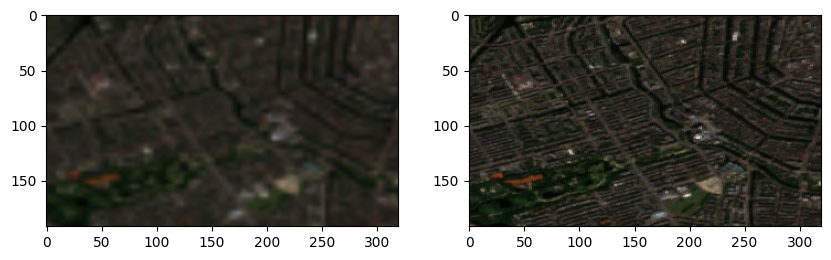

In [75]:
a = next(iter(tr))
lr = a['lr'][0]
hr = a['hr'][0]
lr = (lr + 1) / 2
hr = (hr + 1) / 2

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(lr.permute(1, 2, 0))
axs[1].imshow(hr.permute(1, 2, 0))


11, 26, 30

In [3]:
# import os
# import time
# from IPython.display import clear_output
# pat = 'data/cities/train'

# img_list = [f for f in os.listdir(pat) if f.startswith('capitals_26')]
# for img in img_list:
#     print(img)
    # pipeline.plot_image(img, path_folder=pat, brightness=1)
#     time.sleep(0.5)
#     clear_output(wait=True)
    

In [1]:
from satsr_pipeline.SATSR_PIPELINE import Pipeline
import rasterio
import matplotlib.pyplot as plt

In [8]:
pipeline = Pipeline(
    data_path="data"
)
pipeline.download_images_list(
    points_list=[(25.119403, 55.131912)],
    filename='dubai',
    tile_size=2000,
    max_cloud=0.3,
    meter_per_pixel=5,
    distance_x=4000,
    distance_y=4000,
    divide_mode=None,
)

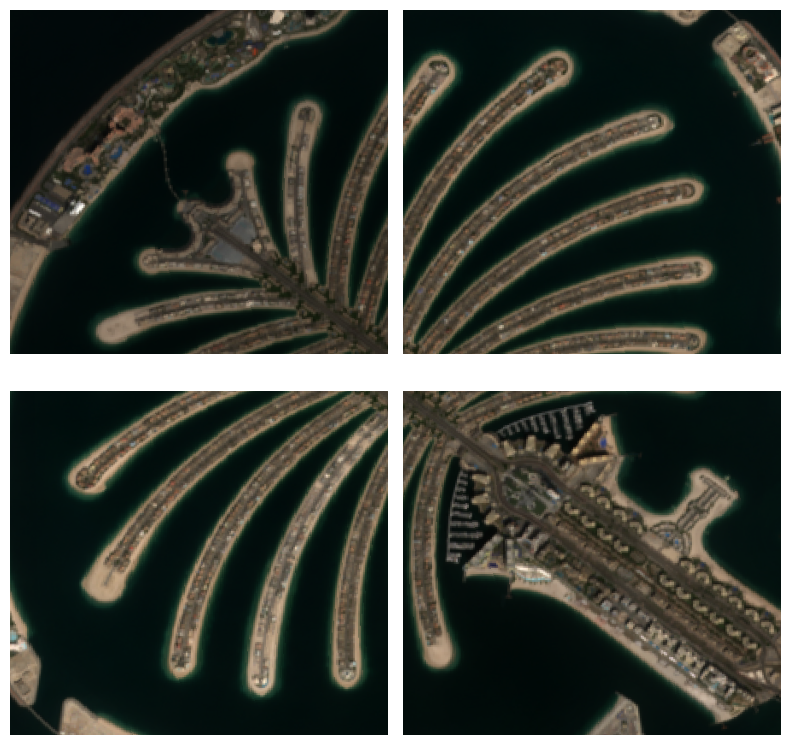

In [16]:

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i, file_name in enumerate(['dubai_6_1.tif', 'dubai_6_3.tif', 'dubai_6_0.tif', 'dubai_6_2.tif']):

    with rasterio.open('data/' + file_name) as src:
        img = src.read()
    img = (img - img.min()) / (img.max() - img.min())
    img = img.transpose(1, 2, 0)[:, :, [0, 1, 2]]
    axes[i // 2, i % 2].imshow(img)
    axes[i // 2, i % 2].axis('off')
plt.tight_layout()
plt.show()
        
        